Stars Type predicion

Type :

Naine rouge - 0
Naine brune - 1
Naine Blanche - 2
Séquence principale - 3
Super Géants - 4
Hyper géants - 5

In [457]:
import pandas as pd
import numpy as np

from math import*


from scipy import constants


import graphviz
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   

from sklearn.model_selection import cross_val_score

from sklearn.tree import export_graphviz

from sklearn.tree import export_graphviz



loading data

In [458]:
star = pd.read_csv('Stars.csv', sep=',')
star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


DATA PRE-processing

In [459]:
star.isnull().sum()
star.describe()
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [460]:
star

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [461]:
star.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [462]:
encoder = LabelEncoder()


star['Color'] = encoder.fit_transform(star['Color'])
star['Spectral_Class'] = encoder.fit_transform(star['Spectral_Class'])


In [463]:
star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


VISUALIZATION

<AxesSubplot:title={'center':'histogramme des Color'}, xlabel='COLOR', ylabel='Frequency'>

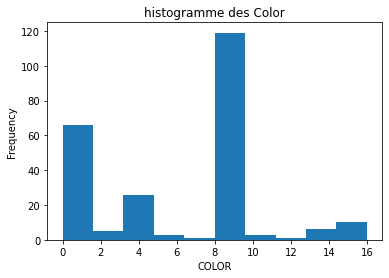

In [464]:
plt.title("histogramme des Color")
plt.xlabel("COLOR")
star["Color"].plot.hist()



<AxesSubplot:title={'center':'histogramme du Spectral_Class'}, xlabel='Spectral_Class', ylabel='Frequency'>

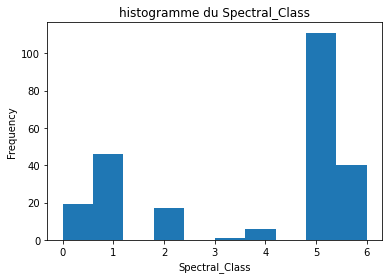

In [465]:
plt.title("histogramme du Spectral_Class")
plt.xlabel("Spectral_Class")
star["Spectral_Class"].plot.hist()

<AxesSubplot:title={'center':'histogramme de la Magnitude absolue'}, xlabel='Magnitude absolue', ylabel='Frequency'>

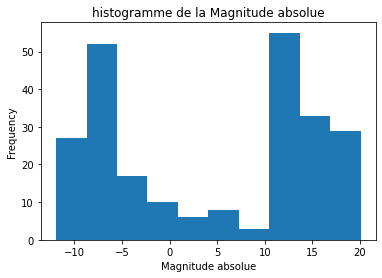

In [466]:
plt.title("histogramme de la Magnitude absolue")
plt.xlabel("Magnitude absolue")
star["A_M"].plot.hist()

<AxesSubplot:title={'center':'histogramme du Rayon relatif'}, xlabel='Rayon relatif', ylabel='Frequency'>

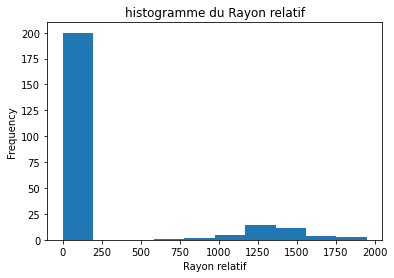

In [467]:
plt.title("histogramme du Rayon relatif")
plt.xlabel("Rayon relatif")
star["R"].plot.hist()

<AxesSubplot:title={'center':'histogramme de la Luminosité relative'}, xlabel='Luminosité relative', ylabel='Frequency'>

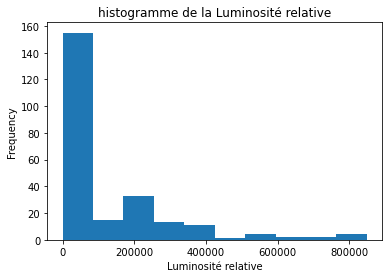

In [468]:
plt.title("histogramme de la Luminosité relative")
plt.xlabel("Luminosité relative")
star["L"].plot.hist()

<AxesSubplot:title={'center':'histogramme de la Temperature'}, xlabel='Temperature', ylabel='Frequency'>

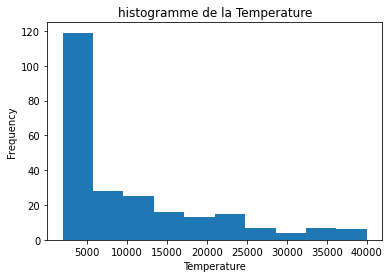

In [469]:
plt.title("histogramme de la Temperature")
plt.xlabel("Temperature")
star["Temperature"].plot.hist()

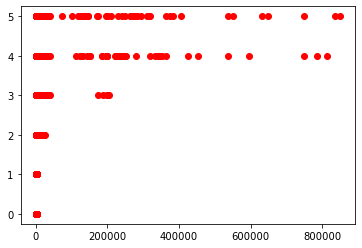

In [470]:
plt.plot(star[["Temperature","R","L","A_M"]], star["Type"] , "ro")

CORRELATIONS

In [471]:
star[["Temperature","R","L","A_M"]].groupby(star["Type"], as_index=True).mean()

,Temperature,R,L,A_M
Type,,,,
0,2997.950,0.110015,0.000693,17.563500
1,3283.825,0.348145,0.005406,12.539975
2,13931.450,0.010728,0.002434,12.582500
3,16018.000,4.430300,32067.386275,-0.367425
4,15347.850,51.150000,301816.250000,-6.369925
5,11405.700,1366.897500,309246.525000,-9.654250


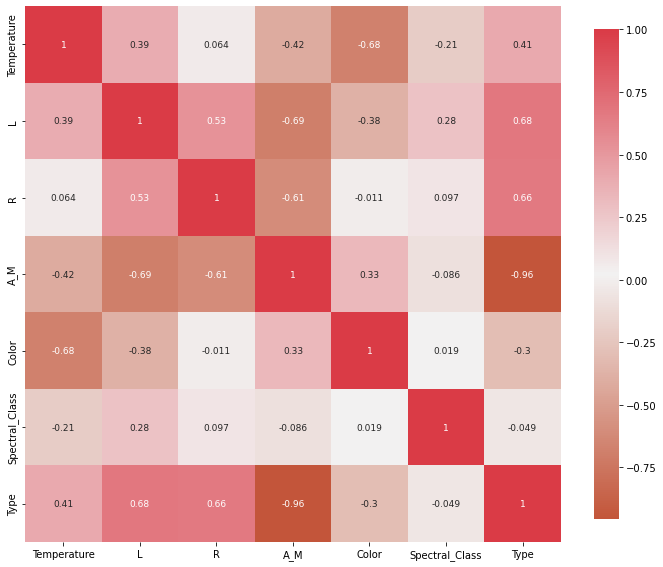

In [472]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 20 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        ) 
    
plot_correlation_map(star)  

FEATURES SELECTION:

Temperature, L, R	



MODELING:
    
MODEL: Decision Tree

In [528]:

x=pd.DataFrame(np.c_[star['Temperature'],star['L'],star['R']]).values
y=star['Type'].values


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=10)

prun_tree = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_depth = 5)
prun_tree.fit(x_train, y_train)   #fitting our model
y_pred=prun_tree.predict(x_test)   # evaluating our model
print("score test:{}".format(accuracy_score(y_test, y_pred)))

print("score training:{}".format(accuracy_score(y_train, prun_tree.predict(x_train))))




score test:0.8125
score training:0.8072916666666666


There is a slight difference between the performance of training data and test data, 
our model is not at risk of overfitting

Application of pruning to maximize the performance of the prediction

The optimal value of max_depth

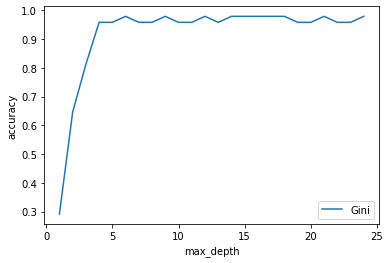

In [529]:
max_depth = []
acc_gini = []

for i in range(1,25):
    prun_tree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    prun_tree.fit(x_train, y_train)
    y_pred = prun_tree.predict(x_test)
    acc_gini.append(accuracy_score(y_test, y_pred))
    max_depth.append(i)


depth = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'max_depth':pd.Series(max_depth)})


plt.plot('max_depth','acc_gini', data=depth, label='Gini')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Training of the pruning model with max_depth is equivalent to 24

In [531]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=10)

prun_tree = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_depth = 24)
                                     
prun_tree.fit(x_train, y_train)   
y_pred=prun_tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.9666666666666667


Visualization  Decision Tree

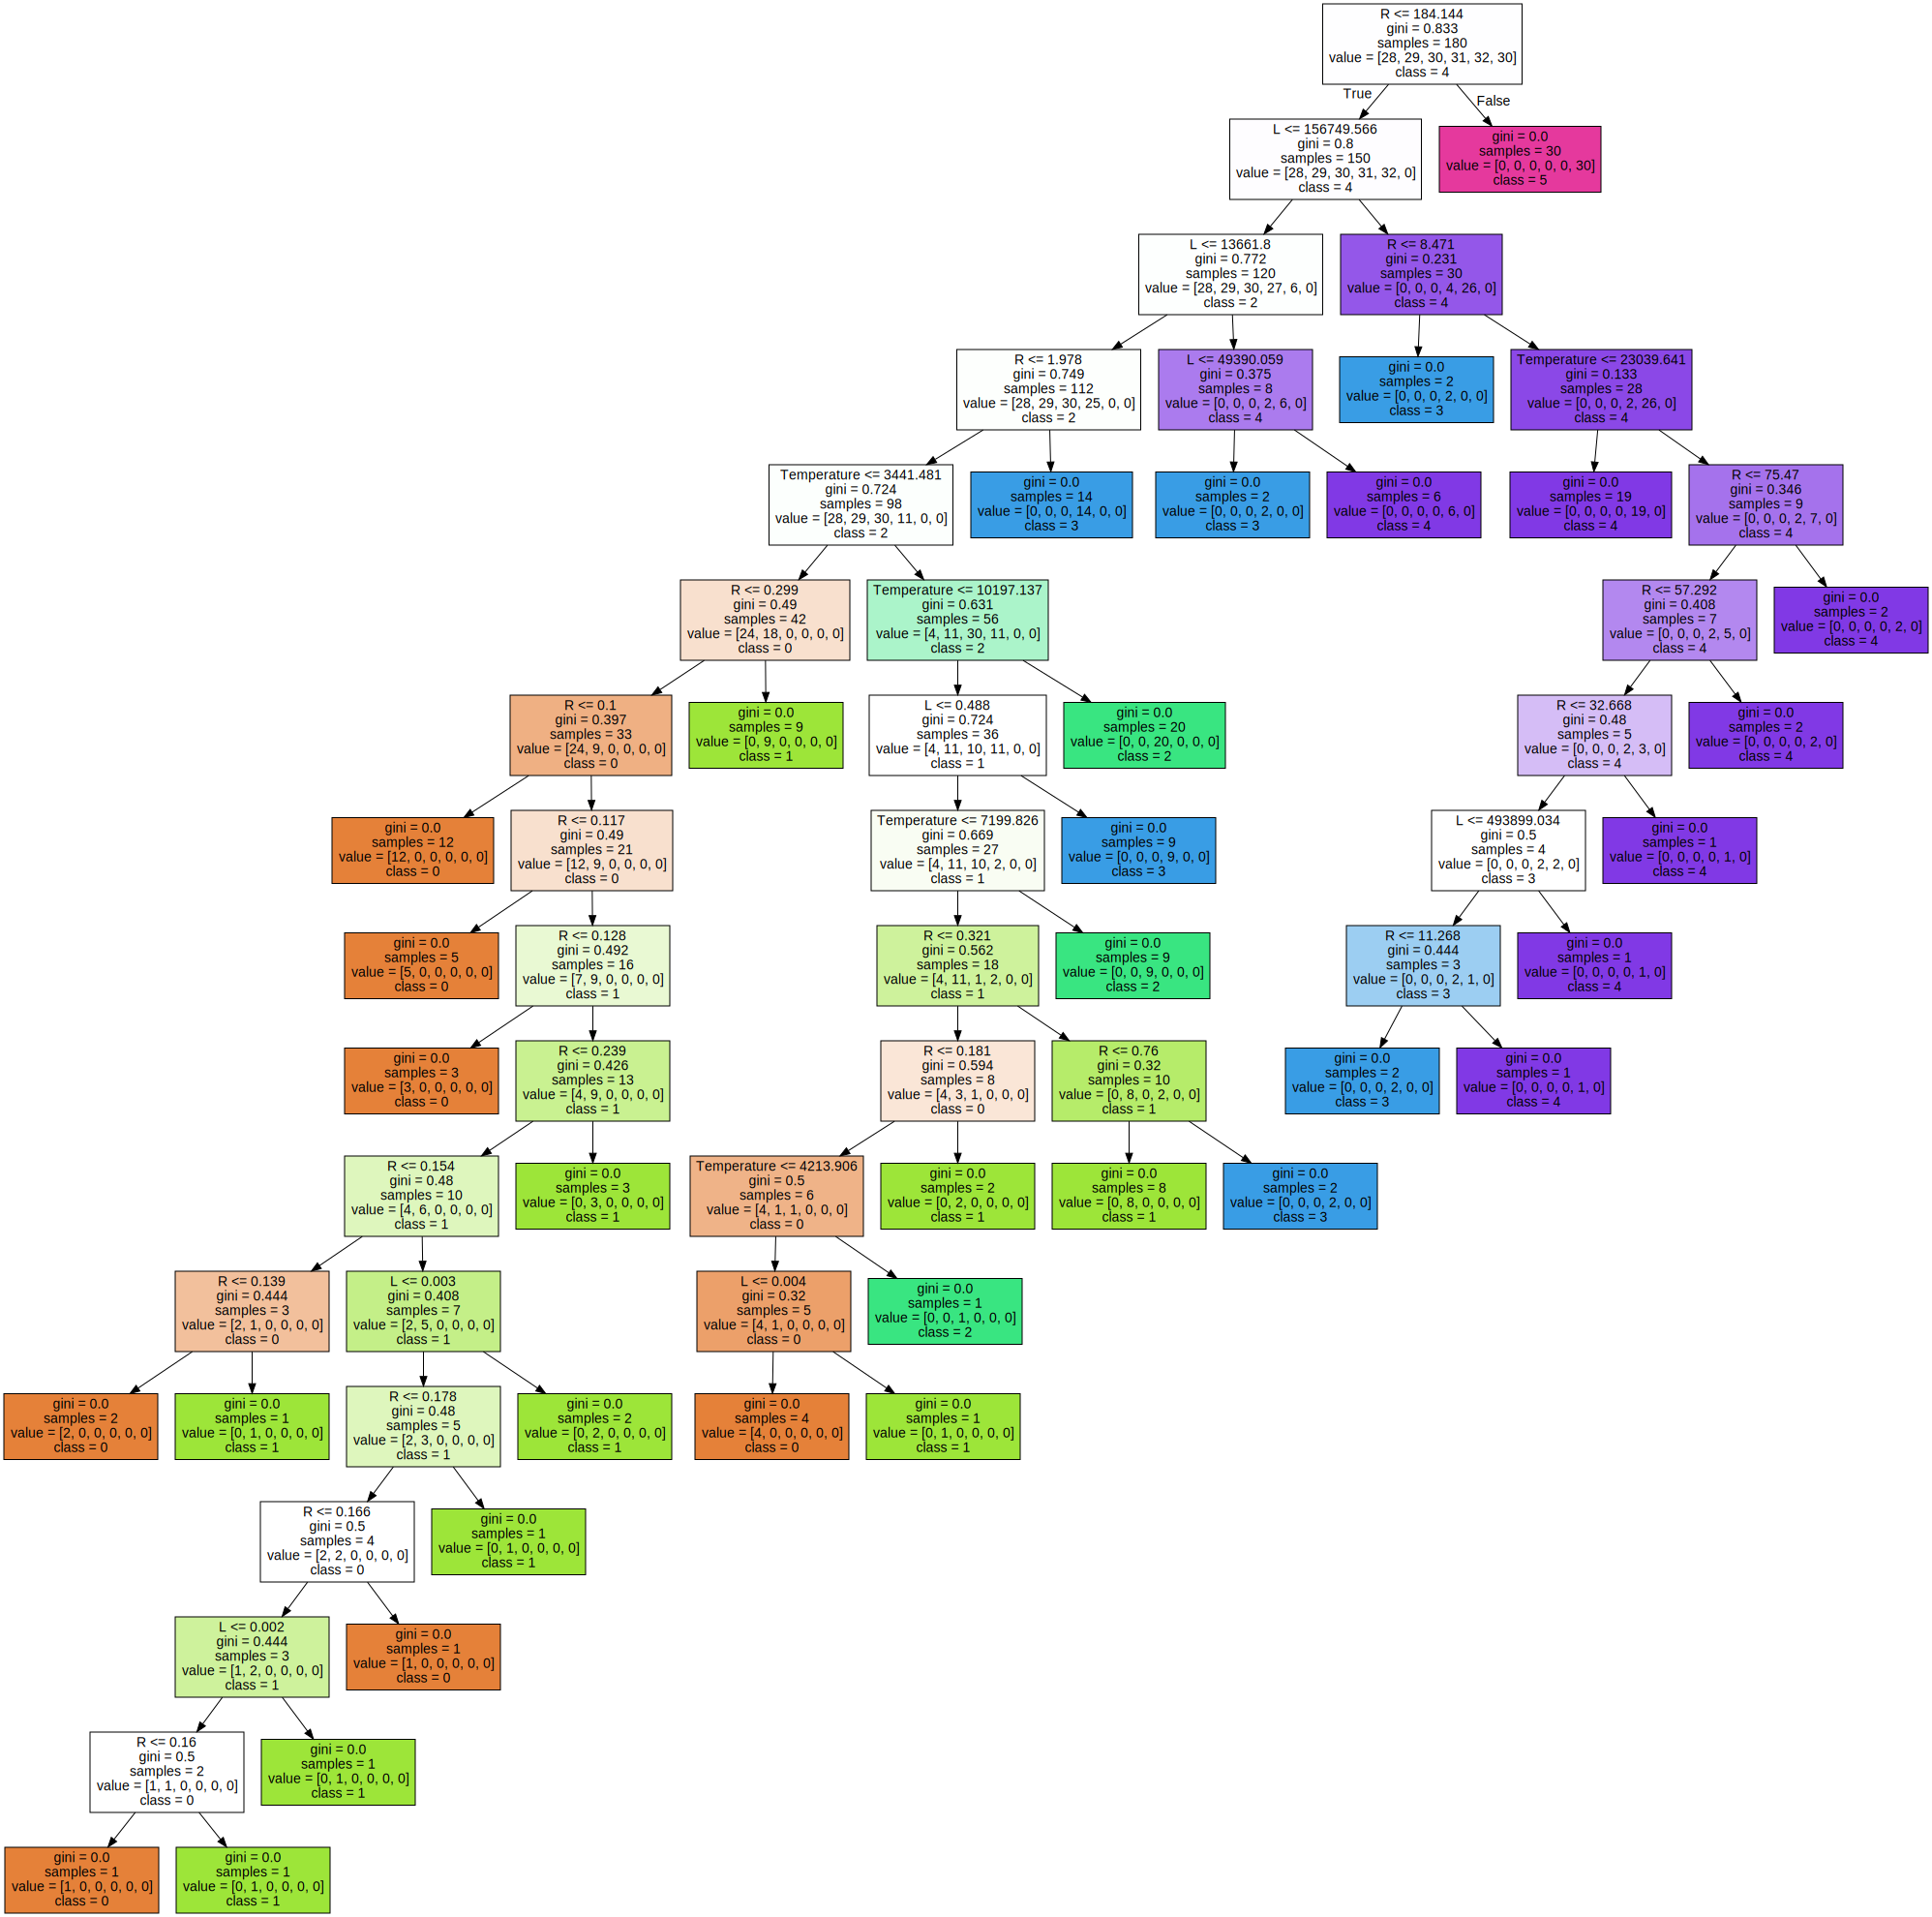

In [532]:

plotting_tre=tree.export_graphviz(prun_tree, out_file=None, 
                                feature_names=['Temperature', 'L', 'R' ],
                                class_names=['0','1','2','3','4','5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(plotting_tre, format="png") 
graph

Start new prediction with the model

Creation of the prediction function: ¶ star_predict ¶


In [533]:

def star_predict( T_k = 0, R_star = 0 ):
    
    Lo = 3.828e26                                      #(luminosité moyenne du soleil)
    Ro = 6.9551e8                                      #(rayon moyen du soleil)

    R = R_star/Ro                                     
    σ = constants.value('Stefan-Boltzmann constant')
    L_star = (4*pi*σ)*(math.pow(R,2))*(math.pow(T_k,4))
    L = L_star/Lo
    dict_fonc = {'Temperature': T_k,'L':L,'R':R}
    typ = ['Naine rouge', 'Naine brune', 'Naine Blanche', 'Séquence principale', 'Super Géant', 'Hyper géant']
    x = pd.DataFrame(dict_fonc, index=[0])
    y_pred=prun_tree.predict(x)
    for i in range(6):
        if i == y_pred:
            star_type = typ[i]
    return  print("star_Type : {}".format(star_type))      
    

    

Let's predict the type of the Betelgeuse star
  Betelgeuse star: Temperature = 3500 k; Radius = 617.1.10 ^ 9 m

In [534]:
star_predict(3500, 617.1e9)

star_Type : Hyper géant


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Bételgeuse type : Hyper géant